In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from yellowbrick.model_selection import FeatureImportances
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv(filepath_or_buffer= "https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/credit_fraud.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.shape

(10000, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10000 non-null  int64  
 1   V1      10000 non-null  float64
 2   V2      10000 non-null  float64
 3   V3      10000 non-null  float64
 4   V4      10000 non-null  float64
 5   V5      10000 non-null  float64
 6   V6      10000 non-null  float64
 7   V7      10000 non-null  float64
 8   V8      10000 non-null  float64
 9   V9      10000 non-null  float64
 10  V10     10000 non-null  float64
 11  V11     10000 non-null  float64
 12  V12     10000 non-null  float64
 13  V13     10000 non-null  float64
 14  V14     10000 non-null  float64
 15  V15     10000 non-null  float64
 16  V16     10000 non-null  float64
 17  V17     10000 non-null  float64
 18  V18     10000 non-null  float64
 19  V19     10000 non-null  float64
 20  V20     10000 non-null  float64
 21  V21     10000 non-null  float64
 22 

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5966.033400,-0.241862,0.281949,0.906270,0.264148,-0.046398,0.133108,-0.071689,-0.064778,0.802224,...,-0.051990,-0.152671,-0.033268,0.021335,0.087146,0.108140,0.005518,0.002915,63.030188,0.00380
std,4473.403739,1.521679,1.308139,1.159154,1.441235,1.182935,1.307311,1.077430,1.259064,1.155198,...,0.913811,0.631083,0.487814,0.594430,0.428171,0.562793,0.410868,0.266247,184.486158,0.06153
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.00000
25%,2072.750000,-1.013283,-0.208342,0.412799,-0.614424,-0.643390,-0.629934,-0.542336,-0.190747,0.070868,...,-0.268120,-0.549638,-0.174120,-0.327817,-0.158137,-0.327974,-0.084489,-0.015753,5.000000,0.00000
50%,4563.500000,-0.372799,0.288524,0.944361,0.219861,-0.152769,-0.152566,-0.055585,0.012865,0.805275,...,-0.123273,-0.136746,-0.045794,0.079976,0.121001,0.042865,-0.004568,0.015897,15.950000,0.00000
75%,10233.250000,1.150864,0.901879,1.602903,1.125666,0.371081,0.505357,0.476280,0.274533,1.506299,...,0.032707,0.247490,0.081665,0.410877,0.359058,0.476394,0.120811,0.077182,50.960000,0.00000
max,15012.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.00000


In [ ]:
data.skew(numeric_only=True)

,0
Time,0.438652
V1,-2.175890
V2,-3.847834
V3,-2.597671
V4,0.349708
V5,1.187416
V6,1.070722
V7,0.411901
V8,-9.718558
V9,0.487349


##  Data Processing

In [ ]:
before_shape = data.shape
print(f"shape before data cleaning = {before_shape}")

data.drop_duplicates(inplace=True)

after_shape = data.shape
print(f"shape after data cleaning = {after_shape}")

drop_nums = before_shape[0] - after_shape[0]
drop_percent = np.round(drop_nums / before_shape[0], decimals = 5) * 100
print('Drop Ratio:', drop_percent, '%')

shape before data cleaning = (10000, 31)
shape after data cleaning = (9958, 31)
Drop Ratio: 0.42 %


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9958 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9958 non-null   int64  
 1   V1      9958 non-null   float64
 2   V2      9958 non-null   float64
 3   V3      9958 non-null   float64
 4   V4      9958 non-null   float64
 5   V5      9958 non-null   float64
 6   V6      9958 non-null   float64
 7   V7      9958 non-null   float64
 8   V8      9958 non-null   float64
 9   V9      9958 non-null   float64
 10  V10     9958 non-null   float64
 11  V11     9958 non-null   float64
 12  V12     9958 non-null   float64
 13  V13     9958 non-null   float64
 14  V14     9958 non-null   float64
 15  V15     9958 non-null   float64
 16  V16     9958 non-null   float64
 17  V17     9958 non-null   float64
 18  V18     9958 non-null   float64
 19  V19     9958 non-null   float64
 20  V20     9958 non-null   float64
 21  V21     9958 non-null   float64
 22  V22  

In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data['V3'].unique()

array([2.53634674, 0.16648011, 1.77320934, ..., 2.33482193, 1.50762389,
       1.95871523])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9958 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9958 non-null   int64  
 1   V1      9958 non-null   float64
 2   V2      9958 non-null   float64
 3   V3      9958 non-null   float64
 4   V4      9958 non-null   float64
 5   V5      9958 non-null   float64
 6   V6      9958 non-null   float64
 7   V7      9958 non-null   float64
 8   V8      9958 non-null   float64
 9   V9      9958 non-null   float64
 10  V10     9958 non-null   float64
 11  V11     9958 non-null   float64
 12  V12     9958 non-null   float64
 13  V13     9958 non-null   float64
 14  V14     9958 non-null   float64
 15  V15     9958 non-null   float64
 16  V16     9958 non-null   float64
 17  V17     9958 non-null   float64
 18  V18     9958 non-null   float64
 19  V19     9958 non-null   float64
 20  V20     9958 non-null   float64
 21  V21     9958 non-null   float64
 22  V22  

## Exploratory Data Analysis

**What is the frequency and proportion of fraudulent and non-fraudulent transactions?**

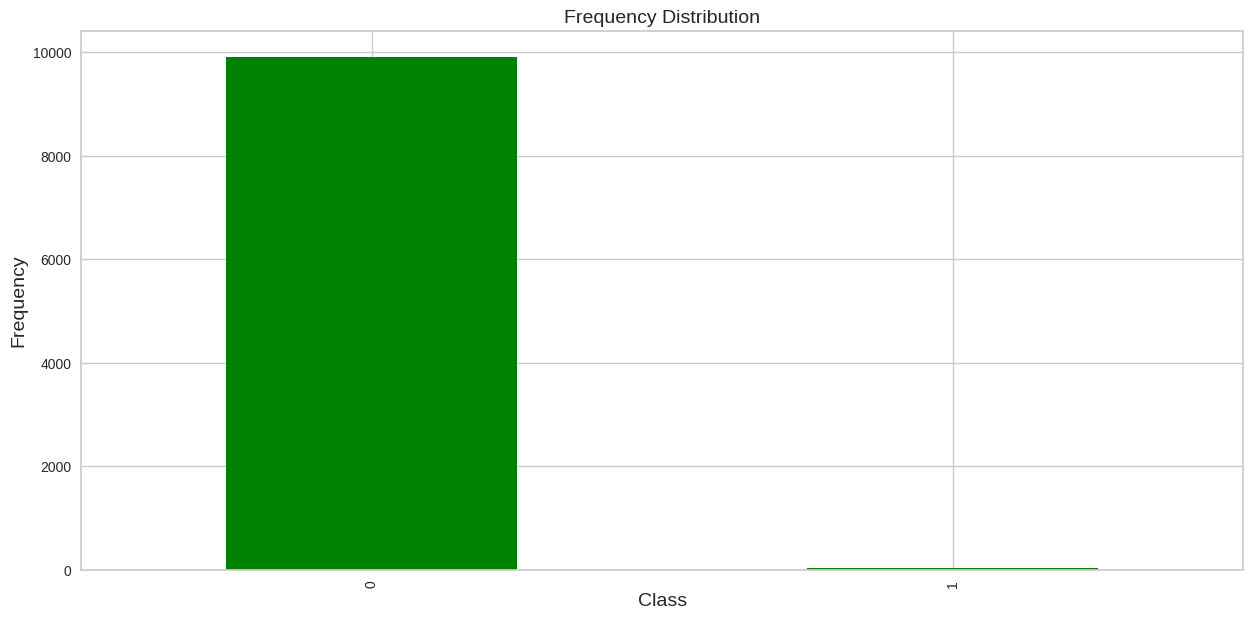

In [ ]:
paper = plt.figure(figsize=(15,7))
data['Class'].value_counts().plot.bar(color="green")
plt.xlabel(xlabel = 'Class', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)
plt.grid(visible=True)
plt.show()

In [ ]:
data['Class'].value_counts()

,count
Class,
0,9920
1,38


**Is there any association between fraudulent and non-fraudulent transactions with respect to time?**

In [ ]:
data['Time (in Hours)'] = data['Time']/3600

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time (in Hours)
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556


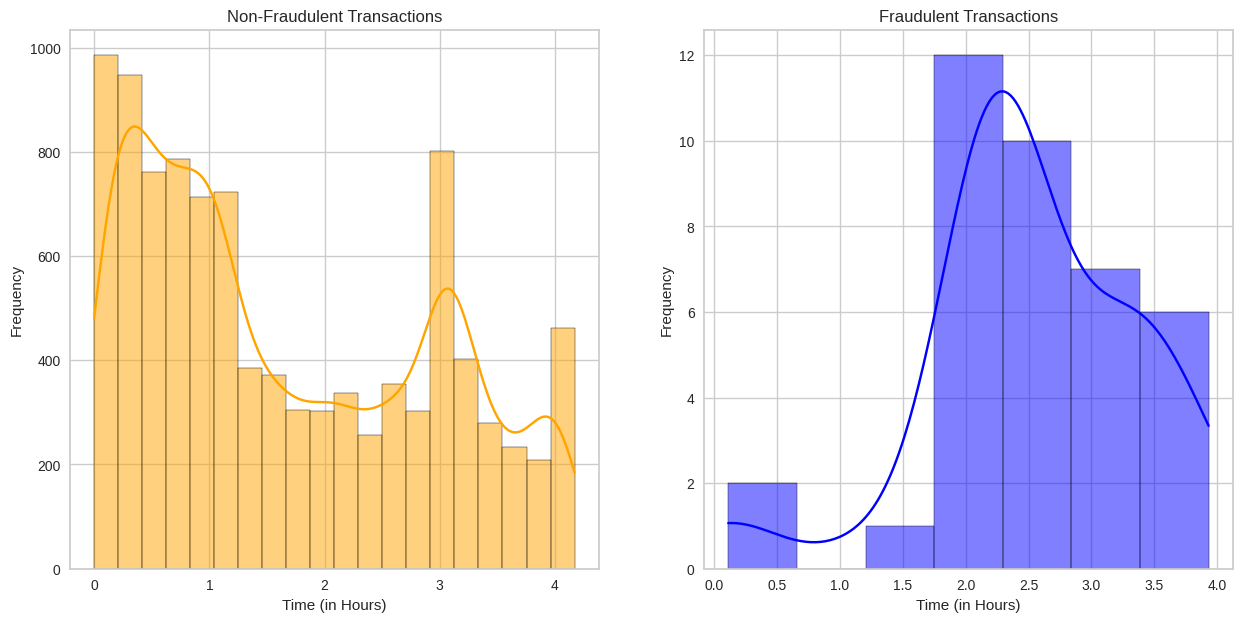

In [ ]:
nonFraud = data['Time (in Hours)'][data['Class']==0]
Fraud = data['Time (in Hours)'][data['Class']==1]
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,7))
sns.histplot(x=nonFraud,kde=True,ax = ax1,color='orange')
ax1.set_title('Non-Fraudulent Transactions')
ax1.set_xlabel('Time (in Hours)')
ax1.set_ylabel('Frequency')
sns.histplot(x=Fraud,kde=True,ax = ax2,color='blue')
ax2.set_title('Fraudulent Transactions')
ax2.set_xlabel('Time (in Hours)')
ax2.set_ylabel('Frequency')
plt.show()

*` Is there any association between fraudulent and non-fraudulent transactions with respect to Amount?`*


<Figure size 1500x1000 with 0 Axes>

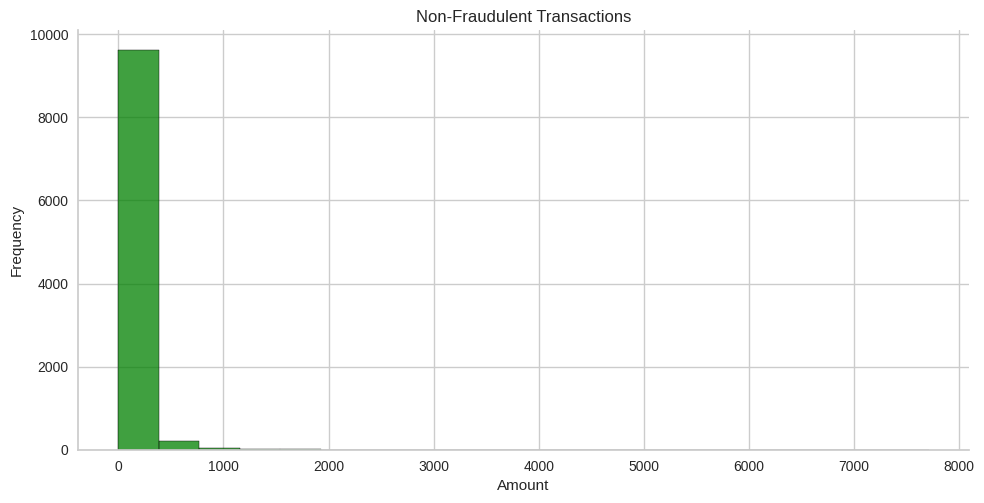

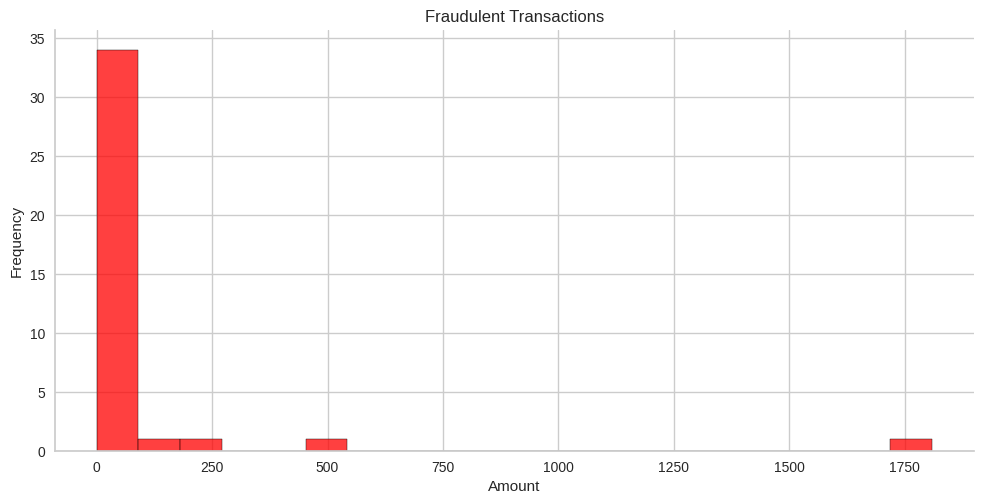

In [ ]:
paper = plt.figure(figsize=(15, 10))
sns.displot(x=data['Amount'][data['Class']==0],color='green',aspect=2,bins=20)
plt.title('Non-Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(visible=True)
plt.show()
sns.displot(x=data['Amount'][data['Class']==1],color='red',aspect=2,bins=20)
plt.title('Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(visible=True)
plt.show()

In [ ]:
print(f'Fraudulent Transactions > $1000: {len(data[(data["Amount"]>1000) & (data["Class"]==1)])}')

Fraudulent Transactions > $1000: 1


## Feature Selection

In [ ]:
datacolumns = data.columns.to_list()
datacolumns.remove('Class')
encoder = StandardScaler()
data[datacolumns] = encoder.fit_transform(data[datacolumns])

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time (in Hours)
0,-1.336136,-0.740430,-0.268490,1.404435,0.773388,-0.246806,0.254187,0.287532,0.129233,-0.379098,...,0.681146,-0.157124,0.074403,0.096474,-0.530149,0.314976,-0.090509,0.467488,0,-1.336136
1,-1.336136,0.941561,-0.008848,-0.638986,0.128891,0.089614,-0.162384,-0.008024,0.118349,-0.915179,...,-0.774555,0.276730,-0.610541,0.186735,0.029387,-0.040765,0.043888,-0.327455,0,-1.336136
2,-1.335912,-0.739472,-1.239381,0.746419,0.081507,-0.386055,1.277445,0.799799,0.248491,-2.005353,...,1.465520,1.932404,-1.198934,-0.969389,-0.441304,-0.156490,-0.235882,1.706674,0,-1.335912
3,-1.335912,-0.481021,-0.354630,0.763478,-0.779949,0.030219,0.854338,0.285685,0.352364,-1.894858,...,0.248230,-0.320713,-2.017777,1.308731,-0.588435,0.138192,0.219442,0.326169,0,-1.335912
4,-1.335689,-0.607557,0.459663,0.552851,0.097622,-0.304973,-0.026051,0.615522,-0.166338,0.013910,...,1.507767,-0.212409,0.199578,-0.685197,0.697964,0.529267,0.796800,0.036661,0,-1.335689


In [ ]:
x = data.drop('Class',axis=1)
y = data['Class']

In [ ]:
selector = SelectFromModel(estimator=RandomForestClassifier(random_state=42,n_jobs=-1))
selector.fit(x, y)
selected_feat = x.columns[(selector.get_support())]
print('Total Features Selected are', len(selected_feat))
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 8
Threshold set by Model: 0.03
Features: Index(['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V17'], dtype='object')


In [ ]:
selector.estimator

RandomForestClassifier(n_jobs=-1, random_state=42)

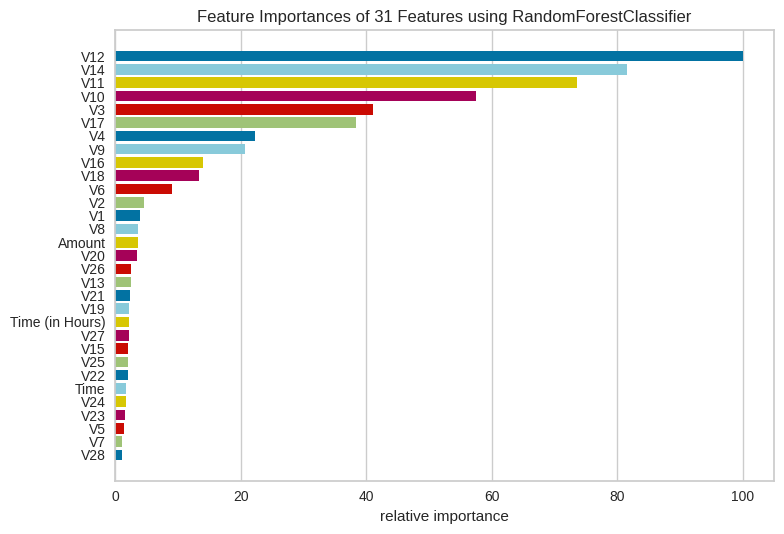

<Axes: title={'center': 'Feature Importances of 31 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [ ]:
viz = FeatureImportances(selector.estimator)
viz.fit(x, y)
viz.show()

In [ ]:
x= data[selected_feat].copy()
y=data['Class'].copy()

In [ ]:
sm = SMOTE(random_state=42,sampling_strategy=1)
x_res, y_res = sm.fit_resample(x, y)
x_new = pd.DataFrame(x_res, columns=x.columns)
y_new = pd.DataFrame(y_res, columns=['Class'])
x_new.head()

,V3,V4,V9,V10,V11,V12,V14,V17
0,1.404435,0.773388,-0.379098,0.290147,-1.131933,0.432798,-0.817633,-0.113311
1,-0.638986,0.128891,-0.915179,0.053916,0.722737,1.535410,-0.682641,-0.447196
2,0.746419,0.081507,-2.005353,0.397233,-0.124100,0.880833,-0.700522,0.819732
3,0.763478,-0.779949,-1.894858,0.156579,-0.853335,0.954303,-0.798887,-1.036077
4,0.552851,0.097622,0.013910,0.897092,-1.364368,1.190129,-1.469622,-0.573631


In [ ]:
y_new.shape

(19840, 1)

In [ ]:
x_new.shape

(19840, 8)

In [ ]:
y_new = pd.Series(y_new)
y_new.value_counts()

,count
Class,
0,9920
1,9920


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42,stratify=y_new)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15872, 8)
(3968, 8)
(15872,)
(3968,)


In [ ]:
clf = GaussianNB()
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
y_train_pred_prob = clf.predict_proba(x_train)
y_test_pred_prob = clf.predict_proba(x_test)

In [ ]:
pd.DataFrame(y_train_pred_prob)

,0,1
0,1.135211e-279,1.000000e+00
1,2.560837e-84,1.000000e+00
2,1.000000e+00,2.630442e-11
3,1.000000e+00,5.268526e-10
4,2.801192e-279,1.000000e+00
...,...,...
15867,4.900719e-54,1.000000e+00
15868,1.000000e+00,7.313361e-11
15869,1.000000e+00,5.847746e-10
15870,1.000000e+00,1.594643e-11


In [ ]:
logistic_report_train = classification_report(y_train, y_train_pred)
logistic_report_test = classification_report(y_test, y_test_pred)
print('                    Training Report          ')
print(logistic_report_train)
print('                    Testing Report           ')
print(logistic_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7936
           1       0.99      0.99      0.99      7936

    accuracy                           0.99     15872
   macro avg       0.99      0.99      0.99     15872
weighted avg       0.99      0.99      0.99     15872

                    Testing Report           
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1984
           1       0.99      0.98      0.98      1984

    accuracy                           0.98      3968
   macro avg       0.98      0.98      0.98      3968
weighted avg       0.98      0.98      0.98      3968

